<a href="https://colab.research.google.com/github/juDecorous/Sales_Predictions/blob/main/Project_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> **SALES PREDICTION** </center>

Jude Maico Jr.

#Data Dictionary

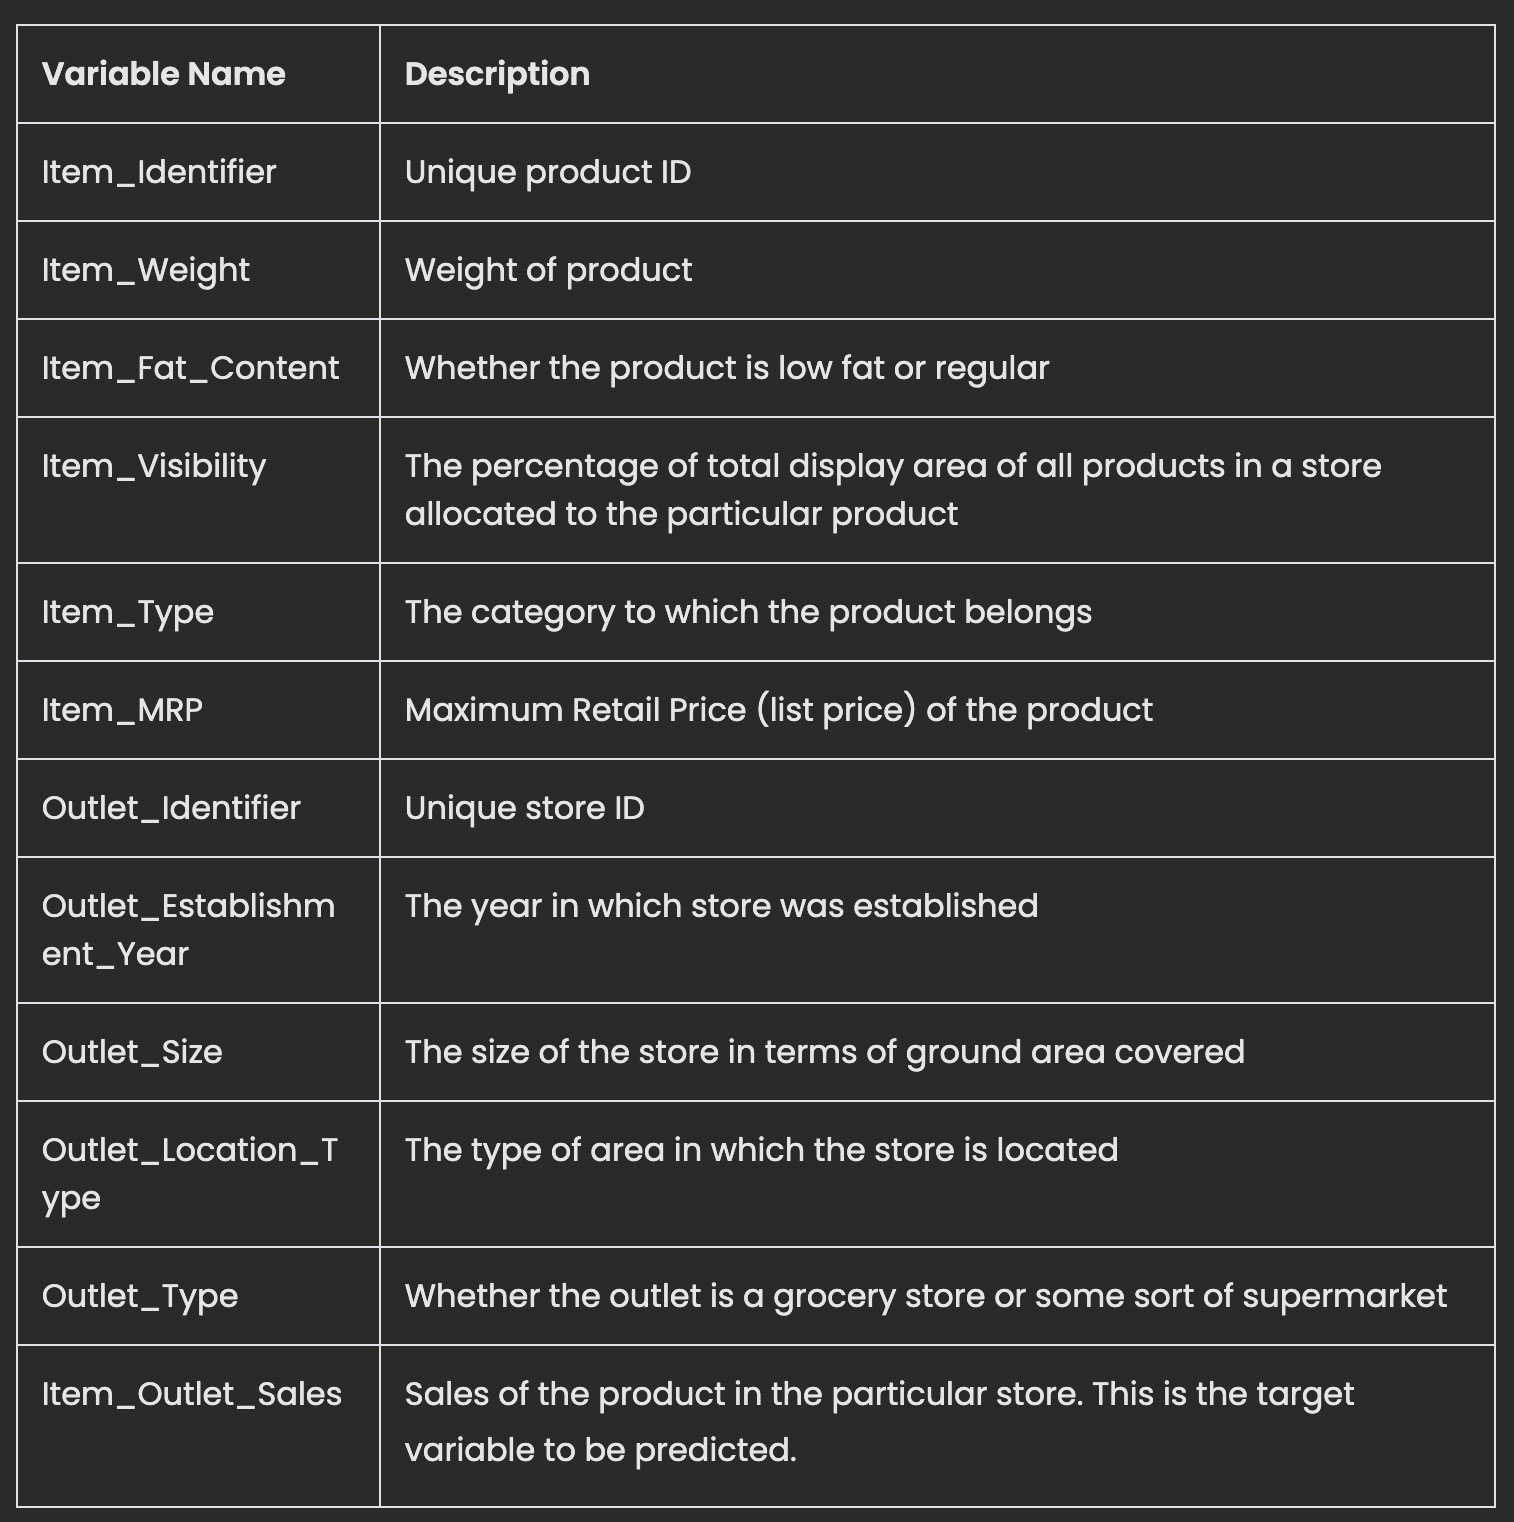

#Imports

In [238]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#Loading Data

In [239]:
df = pd.read_csv('/content/drive/MyDrive/Datas/sales_predictions.csv')


In [240]:
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


#Data Cleaning

## Rows and Columns

In [241]:
df.shape

(8523, 12)

In [242]:
print(f'There is {df.shape[0]} rows, and {df.shape[1]} coulums.')

There is 8523 rows, and 12 coulums.


## Datatypes of each variable

In [243]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Duplicates

In [245]:
df.duplicated().sum()

0

In [246]:
print(f'There is {df.duplicated().sum()} duplicate/s in our data.')

There is 0 duplicate/s in our data.


## Missing Values.

In [247]:
NAs = df.isna().sum()
NAs

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [248]:
df.isna().sum().sum()

3873

In [249]:
#checking percentage of NaN
NaNpercent = ((NAs / df.shape[0])*100).round(2)
NaNpercent

Item_Identifier               0.00
Item_Weight                  17.17
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Size                  28.28
Outlet_Location_Type          0.00
Outlet_Type                   0.00
Item_Outlet_Sales             0.00
dtype: float64

<Axes: >

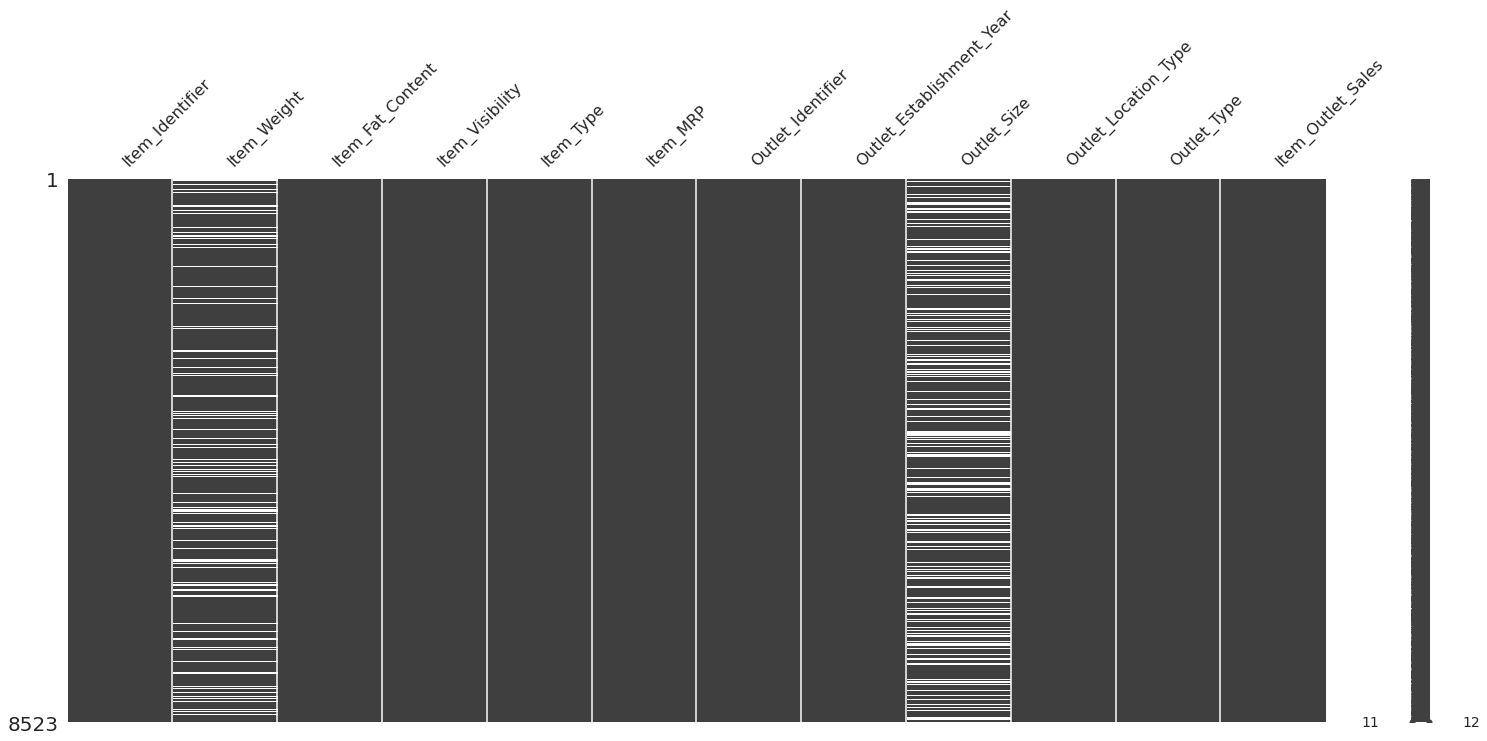

In [250]:
msno.matrix(df)

This graph shows us that the Null values of your data are scattered very randomly.

In [251]:
print(f'We will be dropping a total of {((df.isna().sum().sum())/len(df)*100).round(2)}% of rows if we drop all the NaNs ')

We will be dropping a total of 45.44% of rows if we drop all the NaNs 


We will investigate our Null values Further using the Outlet_Identifier Column.

In [252]:
#Filter Identifier

filter27 = df['Outlet_Identifier'] == 'OUT027'
filter13 = df['Outlet_Identifier'] == 'OUT013'
filter49 = df['Outlet_Identifier'] == 'OUT049'
filter46 = df['Outlet_Identifier'] == 'OUT046'
filter35 = df['Outlet_Identifier'] == 'OUT035'
filter45 = df['Outlet_Identifier'] == 'OUT045'
filter18 = df['Outlet_Identifier'] == 'OUT018'
filter17 = df['Outlet_Identifier'] == 'OUT017'
filter10 = df['Outlet_Identifier'] == 'OUT010'
filter19 = df['Outlet_Identifier'] == 'OUT019'

df[filter10].head(17)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,LF,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
65,FDC46,17.700,LF,0.195068,Snack Foods,185.4266,OUT010,1998,NaN,Tier 3,Grocery Store,184.4266
90,FDW20,20.750,Low Fat,0.040421,Fruits and Vegetables,122.1730,OUT010,1998,NaN,Tier 3,Grocery Store,369.5190
122,FDB14,20.250,Regular,0.171939,Canned,92.5120,OUT010,1998,NaN,Tier 3,Grocery Store,186.4240
133,FDS52,8.890,Low Fat,0.009163,Frozen Foods,101.7016,OUT010,1998,NaN,Tier 3,Grocery Store,101.2016
139,NCN07,18.500,Low Fat,0.056816,Others,132.1284,OUT010,1998,NaN,Tier 3,Grocery Store,263.6568
174,FDI32,17.700,Low Fat,0.291865,Fruits and Vegetables,115.1834,OUT010,1998,NaN,Tier 3,Grocery Store,345.5502


This filter shows us that "OUT019" and "OUT027" on Outlet_Identifier doesn't have weight on them. Another thing is that "OUT010", "OUT045" and "OUT017" on Outlet_Identifier doesn't have values on Outlet_Size. 

In [253]:
df.describe(include="number")

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Addressing Missing Values

In [254]:
df['Item_Weight'].fillna(df['Item_Weight'].median(), inplace = True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

###  Missing Values on Item_Weight:
  - Dropping Missing values on Item_Weight would mean losing 17.17% of my rows. 
  - Only "OUT019" and "OUT027" on Outlet_Identifier doesn't have weight on them

 Dropping 17.17% rows is a great loss on the data, as well as I cannot afford to lose 2 types of Outlet_Identifier. I decided to put the median value of those Null rows in the Item_Weight because this is less affected by outliers than strategy = 'mean'.

In [255]:
df['Outlet_Size'].fillna('Unknown',inplace = True)
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### - Missing Values on Outlet_Size
  - 28.28% of rows are Missing.
  - "OUT010", "OUT045" and "OUT017" on Outlet_Identifier doesn't have values on Outlet_Size.

we cannot afford to lose 28.28% of our data, as well as, 3 types of out Outlet_Identifier. So to save the data, I decided to put 'Unknown' on the Null values under Outlet_Size as there is no way for us to determine the size of the outlet with the current data that we have. 

## Confirm that there are no missing values after addressing them

In [256]:
print(f'The total number of missing values in our data is {df.isna().sum().sum()}.')

The total number of missing values in our data is 0.


## Inconsistensies

###Columns

In [257]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

###Object Columns

In [258]:
data_types = df.dtypes
object_data_types = data_types[(data_types == "object")]
object_data_types

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [259]:
for column in object_data_types.index:
    print(column)
    print(df[column].unique())
    print('\n')

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


Outlet_Size
['Medium' 'Unknown' 'High' 'Small']


Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']


Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']




In [260]:
object_data_types.index

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

##### Fixing inconsistencies

In [261]:
df['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat': 'Low Fat', 'reg':'Regular' }, inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

####Item_Identifier Column

In [262]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

####Item_Type Column

In [263]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

####Item_Fat_Content Column

In [264]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### Outlet_Identifier Column

In [265]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

####Outlet_Size Column

In [266]:
df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

####Outlet_Location_Type Column

In [267]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

####Outlet_Type Column

In [268]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

### Numerical Column


In [269]:
df.describe(include="number")

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


#Exploratory Visuals & Analysis

In [270]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [271]:
sns.set(rc={'figure.figsize':(8,10)})

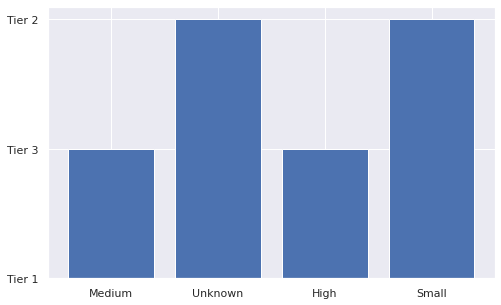

In [272]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.bar(df['Outlet_Size'], df['Outlet_Location_Type']);

Judging on this graph seems like we need to investiga our unknown values. As it seems like half of it should go to Medium Size and another half on the High Size.

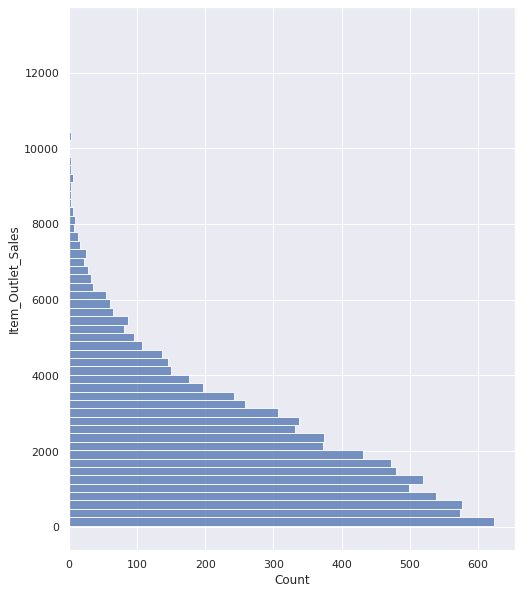

In [273]:
ax = sns.histplot(data=df, y='Item_Outlet_Sales')

Skewed right histogram that shows a gap. This graph demonstrate that there is only a number of outlets that gets higher sales and vice versa. 

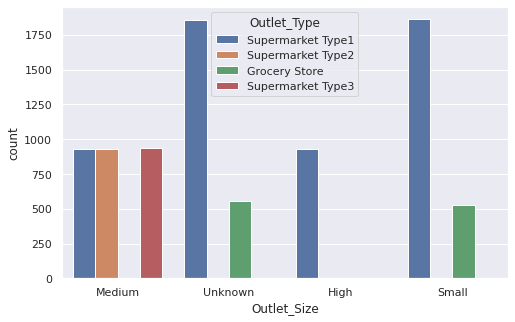

In [274]:
fig, ax = plt.subplots(figsize = (8, 5))
ax = sns.countplot(data=df, hue='Outlet_Type', x='Outlet_Size')

<Axes: xlabel='count', ylabel='Item_Type'>

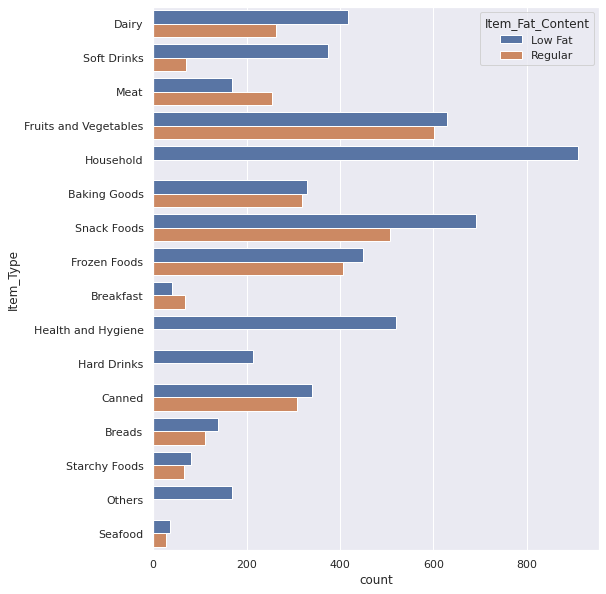

In [275]:
sns.countplot(data=df, y='Item_Type', hue='Item_Fat_Content')

This graph shows the number of items the grocery stores sells together with their fat content.

<Axes: xlabel='Item_Visibility', ylabel='Item_Type'>

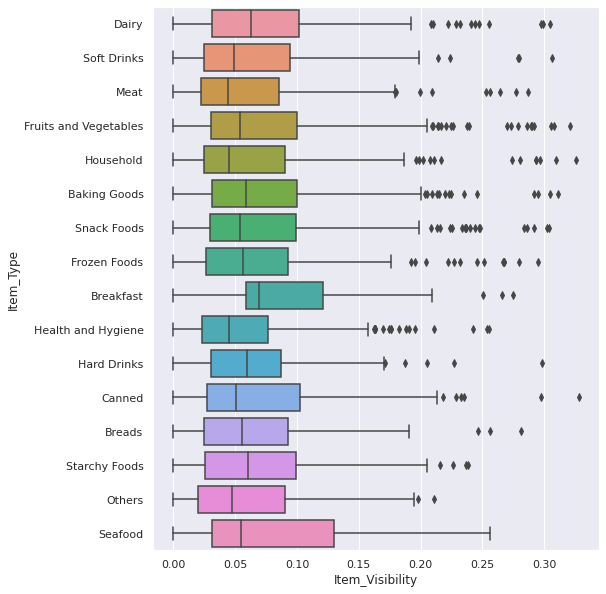

In [276]:
sns.boxplot(data=df, y='Item_Type', x='Item_Visibility')

Our histograph shows that there are only few things to choose from when it comes to seafood but this graph hows us that Seafood is being displayed in most of the grocery stores. 

<Axes: xlabel='Item_Outlet_Sales', ylabel='Outlet_Size'>

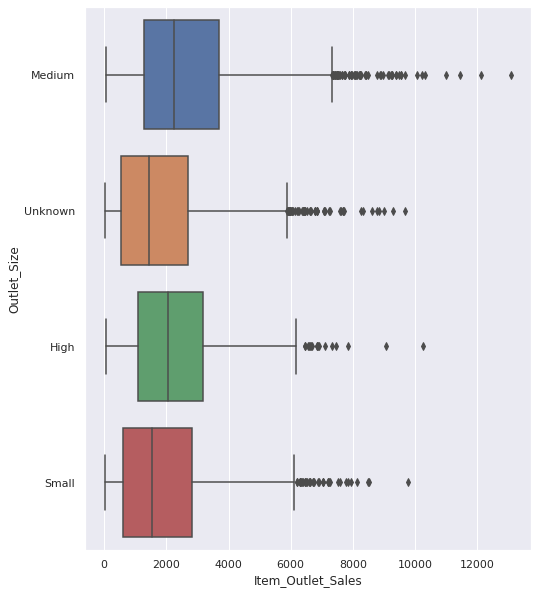

In [277]:
sns.boxplot(data=df, y='Outlet_Size', x='Item_Outlet_Sales')

Seems like we have a lot of outliers when it comes to the Outlet Sales. Medium Outlets seems to sell much more than Bigger-Sized Outlets. 

<Axes: >

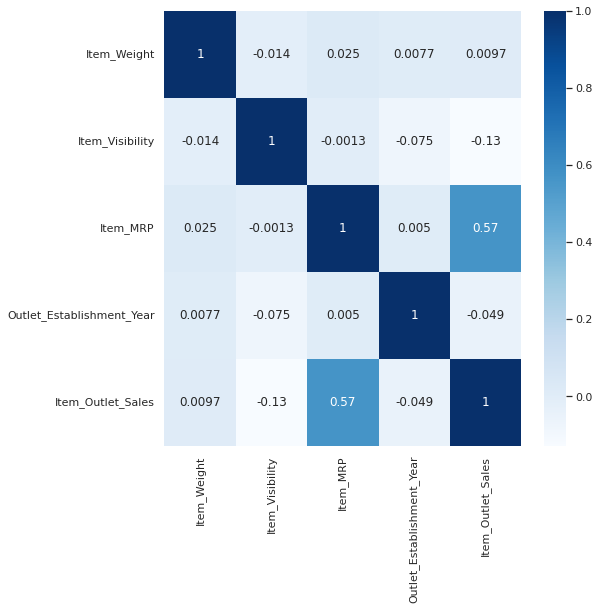

In [278]:
fig, ax = plt.subplots(figsize = (8, 8))
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues',annot = True)

This graph suggest that all of our columns do not have a strong correlation with each other. Moderate correlation can be seen with the Item_Outlet_Sales and Item_MRP.

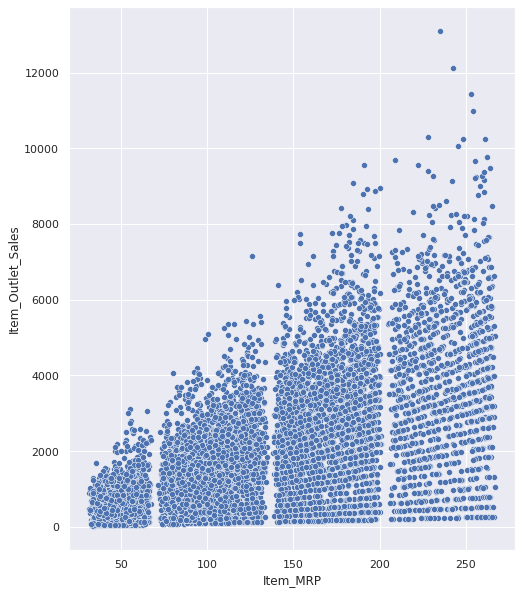

In [279]:
sns.scatterplot(data = df, x = 'Item_MRP', y = 'Item_Outlet_Sales');

Our scatterplot seems to show a positive direction. 